# Skopje weather hypothesis testing

Skopje is the capital and largest city of the Republic of Macedonia. The city's climate is classified as warm and temperate.
Every row in the dataset represents measurments taken every 3 hours in the year 2017. The dataset is obtained from rb5.ru and contains 29 descriptors, including temperature which is the main focus of this project.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from scipy.stats import norm 
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline
from IPython.display import display, Markdown, Latex

## Data sorting

In [2]:
df = pd.read_excel('...sk2017.xls')

In [3]:
df.head(8)

,"# Weather station Skopje / Zajchev Rid, Macedonia, WMO_ID=13588,selection from 01.01.2017 till 31.12.2017, all days",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# Encoding: UTF-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"# The data is provided by the website ""Reliabl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"# If you use the data, please indicate the nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# For meteorological parameters see the addres...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Local time in Skopje / Zajchev Rid,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
6,31.12.2017 22:00,1.8,738.8,766.7,0,86,Wind blowing from the north-west,2,NaN,NaN,...,NaN,NaN,10,-0.4,NaN,NaN,NaN,NaN,NaN,NaN
7,31.12.2017 19:00,4,738.8,766.6,0.3,71,"Calm, no wind",0,NaN,NaN,...,Altocumulus translucidus at a single level.,"No Cirrus, Cirrocumulus or Cirrostratus.",10,-0.9,No precipitation,12,NaN,NaN,NaN,NaN


The first six rows in the data frame are unnecessary so let's skip them.

In [4]:
df = pd.read_excel('C:\\Users\\Filip\\Documents\\PYTHON SCRIPTS\\DATA\\PROJECTS\\Skopje weather\\sk2017.xls', skiprows=6)
# Number of rows and columns
df.shape 

(2827, 29)

In [5]:
df.head()

,Local time in Skopje / Zajchev Rid,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2017 22:00,1.8,738.8,766.7,0.0,86.0,Wind blowing from the north-west,2.0,NaN,NaN,...,NaN,NaN,10,-0.4,NaN,NaN,NaN,NaN,NaN,NaN
1,31.12.2017 19:00,4.0,738.8,766.6,0.3,71.0,"Calm, no wind",0.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"No Cirrus, Cirrocumulus or Cirrostratus.",10,-0.9,No precipitation,12.0,NaN,NaN,NaN,NaN
2,31.12.2017 16:00,6.7,738.5,765.9,0.1,52.0,Wind blowing from the east-southeast,2.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4,-2.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2017 13:00,5.5,738.4,766.0,-1.8,69.0,Wind blowing from the south-southwest,2.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4,0.1,No precipitation,6.0,NaN,NaN,NaN,NaN
4,31.12.2017 10:00,0.0,740.2,768.4,0.9,90.0,"Calm, no wind",0.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4,-1.5,NaN,NaN,NaN,NaN,NaN,NaN


Only weather parameter needed for this project is temperature.

In [6]:
# Separating the temperature column from the other columns
temp = df.iloc[:,0:2]
temp.head()

,Local time in Skopje / Zajchev Rid,T
0,31.12.2017 22:00,1.8
1,31.12.2017 19:00,4.0
2,31.12.2017 16:00,6.7
3,31.12.2017 13:00,5.5
4,31.12.2017 10:00,0.0


The date values should be in opposite order (from january to december).

In [7]:
temp.iloc[:] = temp.iloc[::-1].values
temp.head()

,Local time in Skopje / Zajchev Rid,T
0,01.01.2017 01:00,-5.1
1,01.01.2017 04:00,-6.3
2,01.01.2017 07:00,-7.2
3,01.01.2017 10:00,-2.5
4,01.01.2017 13:00,2.5


In [8]:
# Checking for null values
temp.apply(lambda x: sum(x.isnull()))

Local time in Skopje / Zajchev Rid    0
T                                     1
dtype: int64

In [9]:
# Filling the single null value with the preceding value
temp['T'].fillna(method='ffill',inplace = True)

Text(0.5,1,'Year 2017')

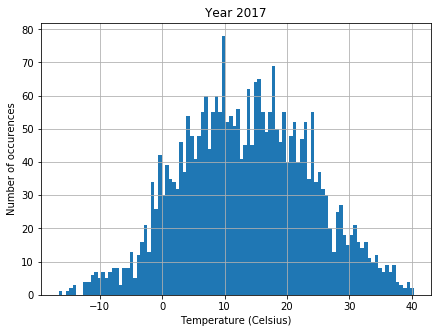

In [10]:
#Plotting a histogram with 100 bins using all the samples
temp.hist(column='T', bins=100, figsize=(7, 5))
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of occurences')
plt.title('Year 2017')

In [11]:
# Stats for the year 2017
stats_2017 = stats.describe(temp['T'])
display(Markdown('The highest recorded temperature in Skopje in 2017 was {}°C , while the lowest recorded temperature was {}°C. The average temperature was {:.1f}°C.'.format(stats_2017.minmax[1],stats_2017.minmax[0],stats_2017.mean)))

The highest recorded temperature in Skopje in 2017 was 40.3°C , while the lowest recorded temperature was -16.6°C. The average temperature was 13.5°C.

## Hyphotesis testing

The Köppen–Geiger climate classification system is a climate classification system. It is used to clasify the climate of a region by using 3 letters. The first letter represents the type of climate, the second indicates precipitation, and the third corresponds to the temperature. For example, Skopje is [classified](https://en.climate-data.org/europe/macedonia/skopje/skopje-1768/) as Cfa, where the "C" represents temperate (mesothermal) climate, "f" stands for no dry seasons, and "a" corresponds to hot summers. 

For the first symbol to be "C" the coldest month should average at lowest 0°C. Using hypothesis testing, let's verify with 5% significance if the city of Skopje should have the 1st symbol to be "C" according to the Köppen–Geiger climate classification system using weather data from the year 2017.
![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/1/1e/World_K%C3%B6ppen_Classification_%28with_authors%29.svg)

### Attaining data from each month of the year

#### Separating the months

In [12]:
# Creating a new column 'month' with values from 1 to 12 for each month
temp['Local time in Skopje / Zajchev Rid'] = pd.to_datetime(temp['Local time in Skopje / Zajchev Rid'], dayfirst=True)
temp['month'] = pd.DatetimeIndex(temp['Local time in Skopje / Zajchev Rid']).month
temp.head()

,Local time in Skopje / Zajchev Rid,T,month
0,2017-01-01 01:00:00,-5.1,1
1,2017-01-01 04:00:00,-6.3,1
2,2017-01-01 07:00:00,-7.2,1
3,2017-01-01 10:00:00,-2.5,1
4,2017-01-01 13:00:00,2.5,1


In [13]:
# Creating slices for each month
temp2=temp.copy()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
slices = []
for i in range(1, 13): 
    slices.append(temp2[temp2['month']==i]) # Adding the monthly slices to the 'slices' list
for x,y in zip(months, slices):
    globals()[x] = y # Naming each slice according to the 'month' list

In [14]:
# Names from the list 'months' will now give us the dataframe for a given month. Example:
August.head()

,Local time in Skopje / Zajchev Rid,T,month
1644,2017-08-01 01:00:00,25.4,8
1645,2017-08-01 04:00:00,20.7,8
1646,2017-08-01 07:00:00,23.6,8
1647,2017-08-01 10:00:00,31.1,8
1648,2017-08-01 13:00:00,35.4,8


#### Getting stats for each month

In [15]:
monthly_stats = []
for month in months:
    monthly_stats.append('stats_' + str(month))

# Items in list 'monthly stats'
monthly_stats

['stats_January',
 'stats_February',
 'stats_March',
 'stats_April',
 'stats_May',
 'stats_June',
 'stats_July',
 'stats_August',
 'stats_September',
 'stats_October',
 'stats_November',
 'stats_December']

In [16]:
stats_values = []
for month in slices:
    stats_values.append(stats.describe(month['T']))
for x,y in zip(monthly_stats, stats_values):
    globals()[x] = y

In [17]:
# Names from the list 'monthly_stats' will now give us the stats for a month. Example:
stats_February

DescribeResult(nobs=222, minmax=(-3.8, 19.6), mean=5.170270270270271, variance=21.80246056010762, skewness=0.7509818165255169, kurtosis=0.5033714016530721)

#### Average and minmax values for each month

In [18]:
display(Markdown("Average temperatures (°C) "))
mean = []
for val in stats_values:
    mean.append(val.mean) # Adding the mean temperature values for each month to the list 'mean'
for month, temperature in zip(months, mean):
    print(month + ": " + str("%.1f" % temperature))

Average temperatures (°C) 

January: -4.0
February: 5.2
March: 11.5
April: 12.8
May: 17.6
June: 23.0
July: 25.5
August: 25.7
September: 19.6
October: 13.3
November: 7.1
December: 3.7


*From above we notice that the coldest month of the year was January, and we will use it for the hypothesis testing.

In [19]:
display(Markdown("Min-max temperatures (°C) "))
minmax = []
for val in stats_values:
    minmax.append(val.minmax)
for month, temperature in zip(months, minmax):
    print(month + ": " + str(temperature))

Min-max temperatures (°C) 

January: (-16.6, 5.9)
February: (-3.8, 19.6)
March: (0.9, 25.9)
April: (1.4, 28.0)
May: (6.8, 29.7)
June: (12.9, 39.7)
July: (15.0, 40.3)
August: (12.3, 40.2)
September: (9.1, 34.1)
October: (-11.0, 25.8)
November: (-4.8, 15.0)
December: (-6.0, 15.0)


In [20]:
maxT=[] #max temperatures
minT=[] #min temperatures
for val in stats_values:
    maxT.append(val.minmax[1])
    minT.append(val.minmax[0])
table = pd.DataFrame({'Month':months, 'Average temperature':mean, 'Maximum temperature':maxT, 'Minimum temperature':minT})
table.head()

,Month,Average temperature,Maximum temperature,Minimum temperature
0,January,-4.015190,5.9,-16.6
1,February,5.170270,19.6,-3.8
2,March,11.528750,25.9,0.9
3,April,12.827039,28.0,1.4
4,May,17.579253,29.7,6.8


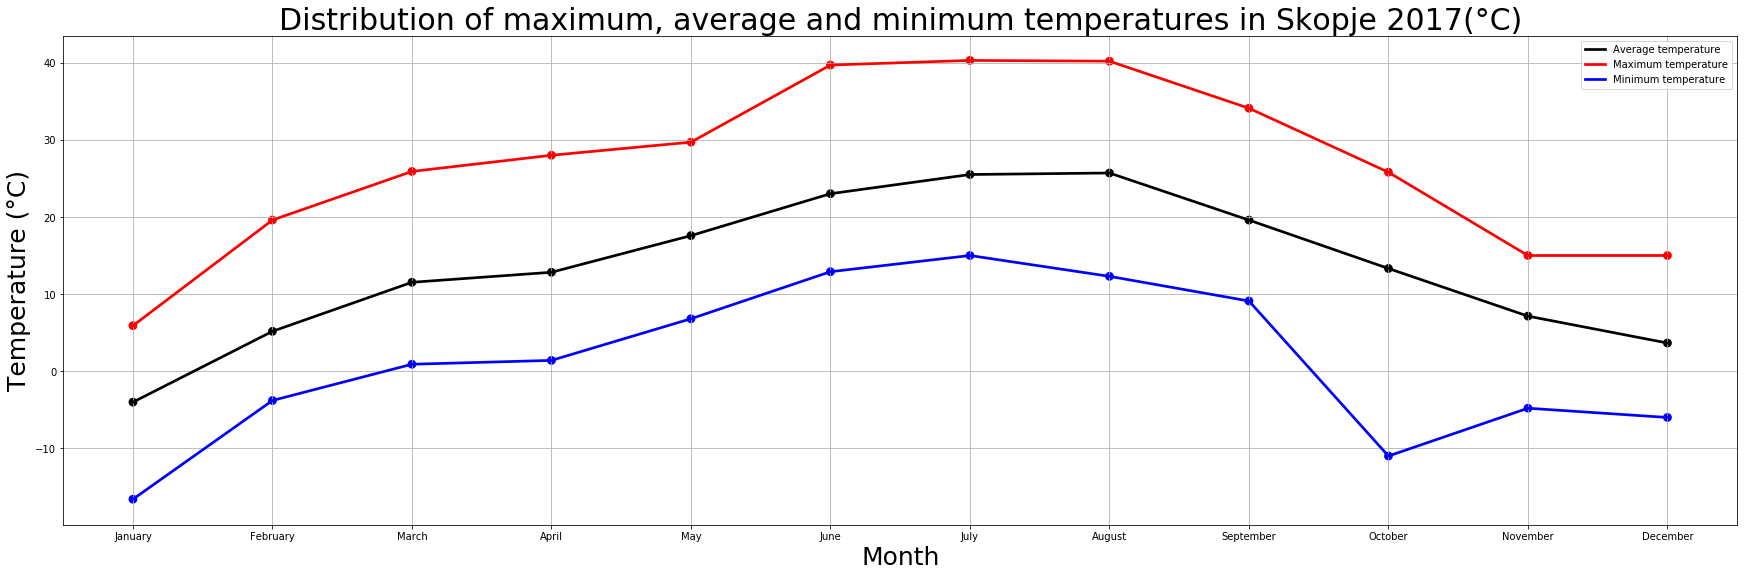

In [21]:
f,ax1 = plt.subplots(figsize =(30,9))
sns.pointplot(x='Month',y='Average temperature',data=table,color='black',alpha=0.8)
sns.pointplot(x='Month',y='Maximum temperature',data=table,color='red',alpha=0.8)
sns.pointplot(x='Month',y='Minimum temperature',data=table,color='blue',alpha=0.8)
ax1.legend(handles=ax1.lines[::len(table)+1], labels=["Average temperature","Maximum temperature","Minimum temperature"])
plt.xlabel('Month',fontsize = 25,color='black') 
plt.title('Distribution of maximum, average and minimum temperatures in Skopje 2017(°C)',fontsize = 30,color='black')
plt.ylabel('Temperature (°C)',fontsize = 25,color='black')
plt.grid()

### Z-test

A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution.

$$ Z = \frac{{x̅}-{μ}}{σ/\sqrt{n}} $$ 

Where $x̅$ is the sample mean, $μ$ is the mean of population, $σ$ is the standard deviation of population, $n$ is the number of samples.

Under the null hypothesis, according to the Köppen–Geiger climate classification system, Skopje is classified as **Cfa** where "C" stands for temperate climates where the minimal average temperature $μ$ is at least 0°C ($μ$  $\ge$ $0$).

The alternative hypothesis is that Skopje should **not** have the first symbol to be "C" i.e that the minimal average temperature in 2017 is significantly less than we observe ($<$ $μ$).


In [22]:
# Calculating the Z value from the formula using stats from the coldest month of the year January
z = (stats_January.mean - 0)/(math.sqrt(stats_January.variance)/math.sqrt(January.shape[0]))
z

-13.564737642460294

Calculating the p value
$P(Z  \le z)$ i.e $P(Z  \le -13.5647)$:

In [23]:
norm.cdf(z)*100

3.240557317806647e-40

Under the null hypothesis μ  $\ge$ $0$,  probability that January has the minimal average temperature of 0°C (or greater) is $3.240557317806647e^{-40}$%.
This low probability is $<5$% significance level.

We reject the null hypothesis and accept the alternative.

Skopje should not have the 1st symbol to be "C" according to the Köppen–Geiger climate classification system using weather data from 2017.